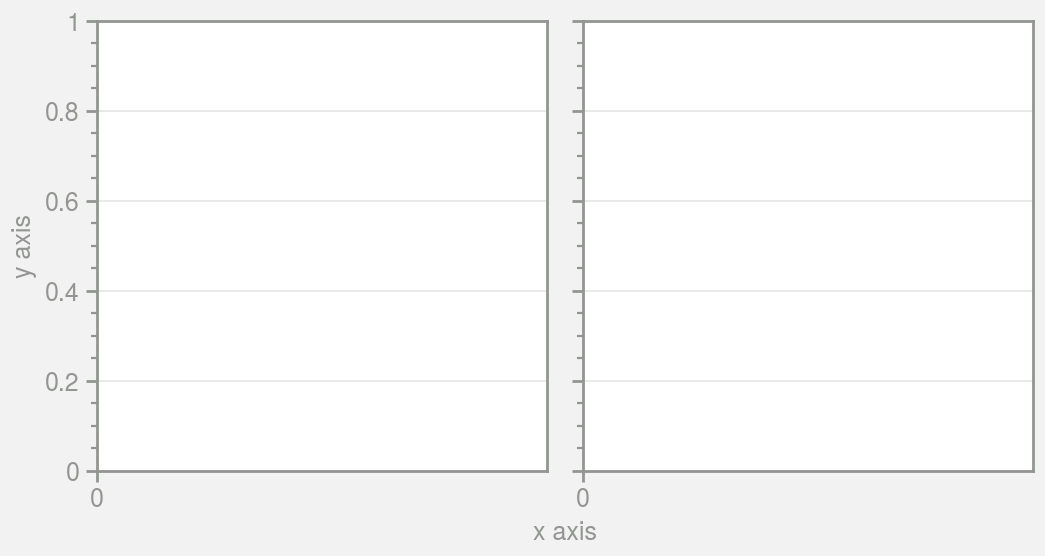

In [1]:
import proplot as plot
f, axs = plot.subplots(ncols=2)
axs.format(linewidth=1, color='gray')
axs.format(xticks=20, xtickminor=True, xlabel='x axis', ylabel='y axis')

(<matplotlib.lines.Line2D at 0x11d57eb80>,
 <matplotlib.lines.Line2D at 0x11d576f10>)

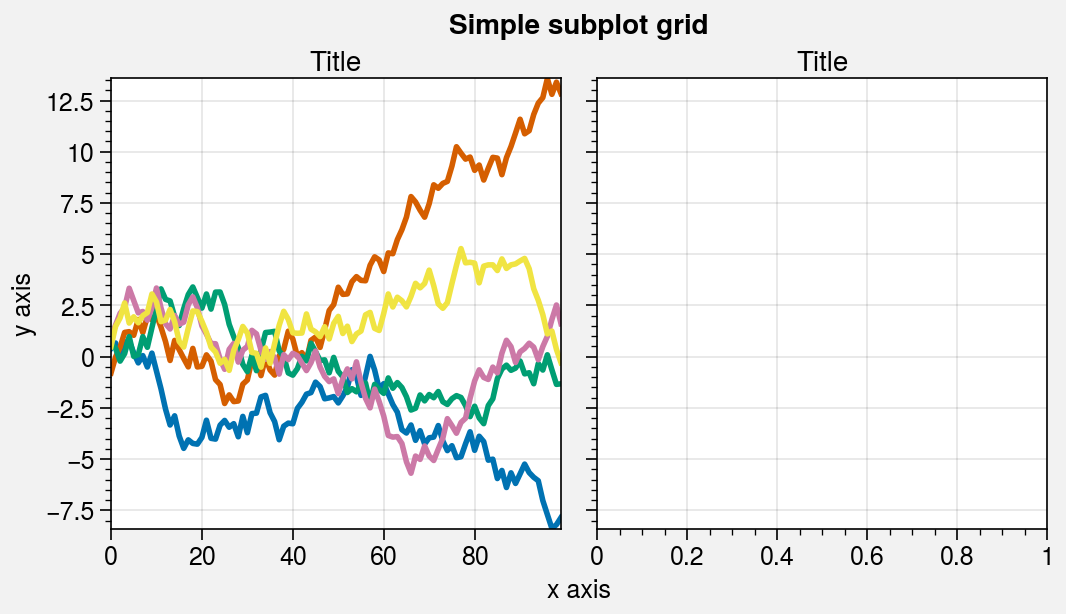

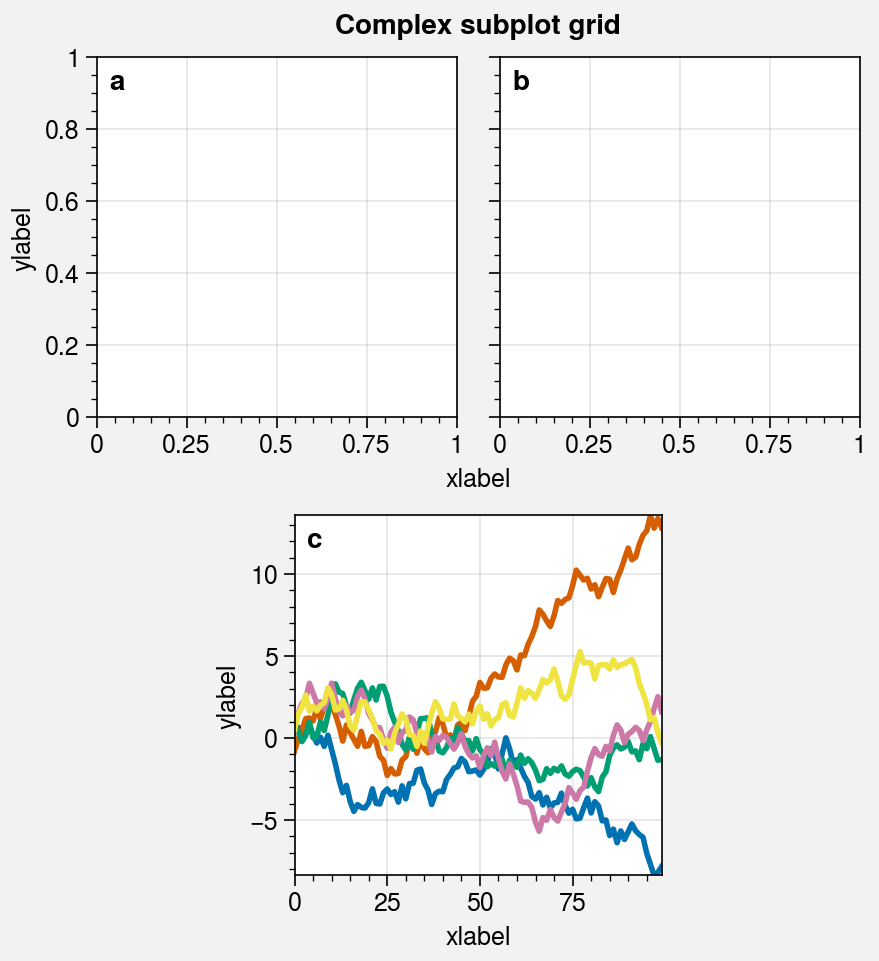

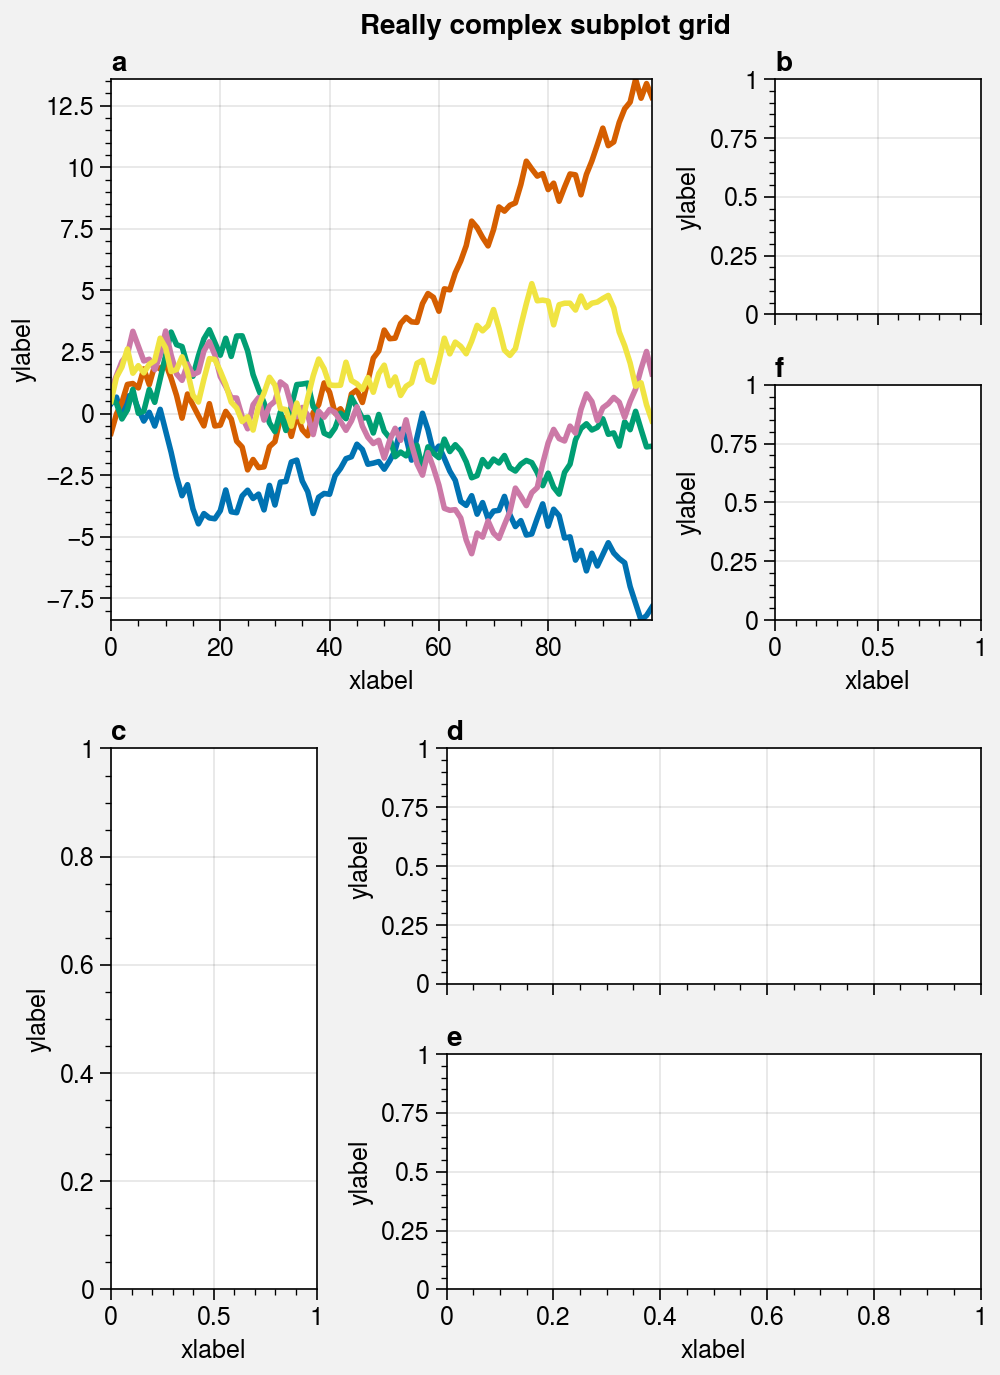

In [2]:
import proplot as plot
import numpy as np
state = np.random.RandomState(51423)
data = 2*(state.rand(100, 5) - 0.5).cumsum(axis=0)

# Simple plot
f, axs = plot.subplots(ncols=2)
axs[0].plot(data, lw=2)
axs[0].format(xticks=20, xtickminor=False)
axs.format(
    suptitle='Simple subplot grid', title='Title',
    xlabel='x axis', ylabel='y axis'
)

# Complex grid
array = [  # the "picture"; 1 == subplot a, 2 == subplot b, etc.
    [1, 1, 2, 2],
    [0, 3, 3, 0],
]
f, axs = plot.subplots(array, axwidth=1.8)
axs.format(
    abc=True, abcloc='ul', suptitle='Complex subplot grid',
    xlabel='xlabel', ylabel='ylabel'
)
axs[2].plot(data, lw=2)

# Really complex grid
array = [  # the "picture"
    [1, 1, 2],
    [1, 1, 6],
    [3, 4, 4],
    [3, 5, 5],
]
f, axs = plot.subplots(array, width=5, span=False)
axs.format(
    suptitle='Really complex subplot grid',
    xlabel='xlabel', ylabel='ylabel', abc=True
)
axs[0].plot(data, lw=2)

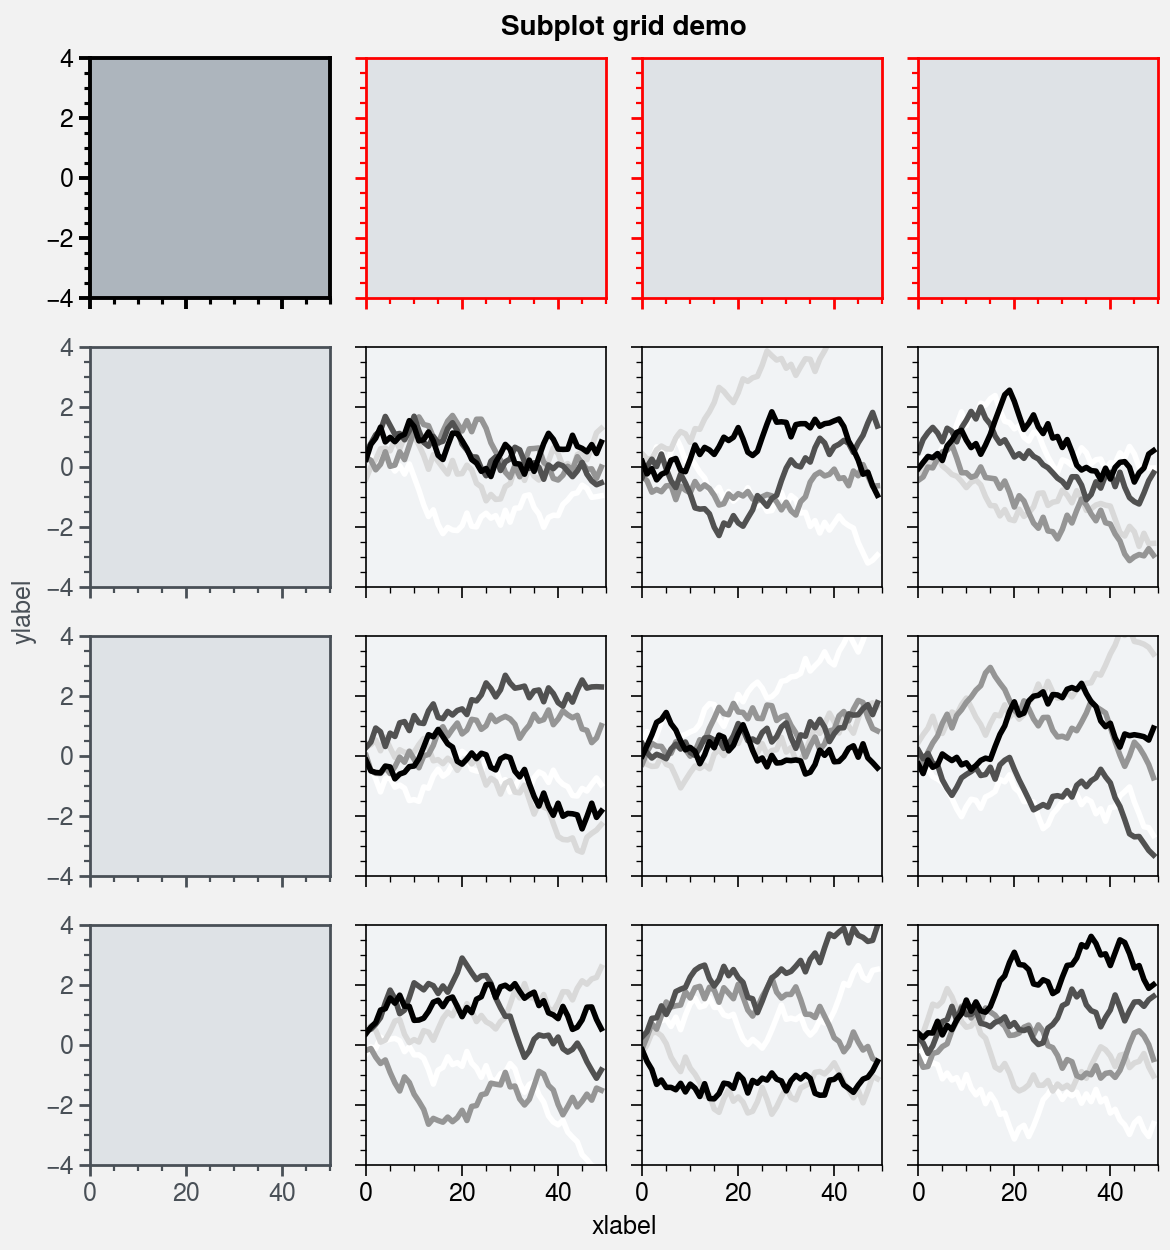

In [3]:
import numpy as np
state = np.random.RandomState(51423)
f, axs = plot.subplots(ncols=4, nrows=4, axwidth=1.2)
axs.format(
    xlabel='xlabel', ylabel='ylabel', suptitle='Subplot grid demo',
    grid=False, xlim=(0, 50), ylim=(-4, 4)
)

# Various ways to select subplots in the subplot grid
axs[:, 0].format(color='gray7', facecolor='gray3', linewidth=1)
axs[0, :].format(color='red', facecolor='gray3', linewidth=1)
axs[0].format(color='black', facecolor='gray5', linewidth=1.4)
axs[1:, 1:].format(facecolor='gray1')
for ax in axs[1:, 1:]:
    ax.plot((state.rand(50, 5) - 0.5).cumsum(axis=0), cycle='Grays', lw=2)

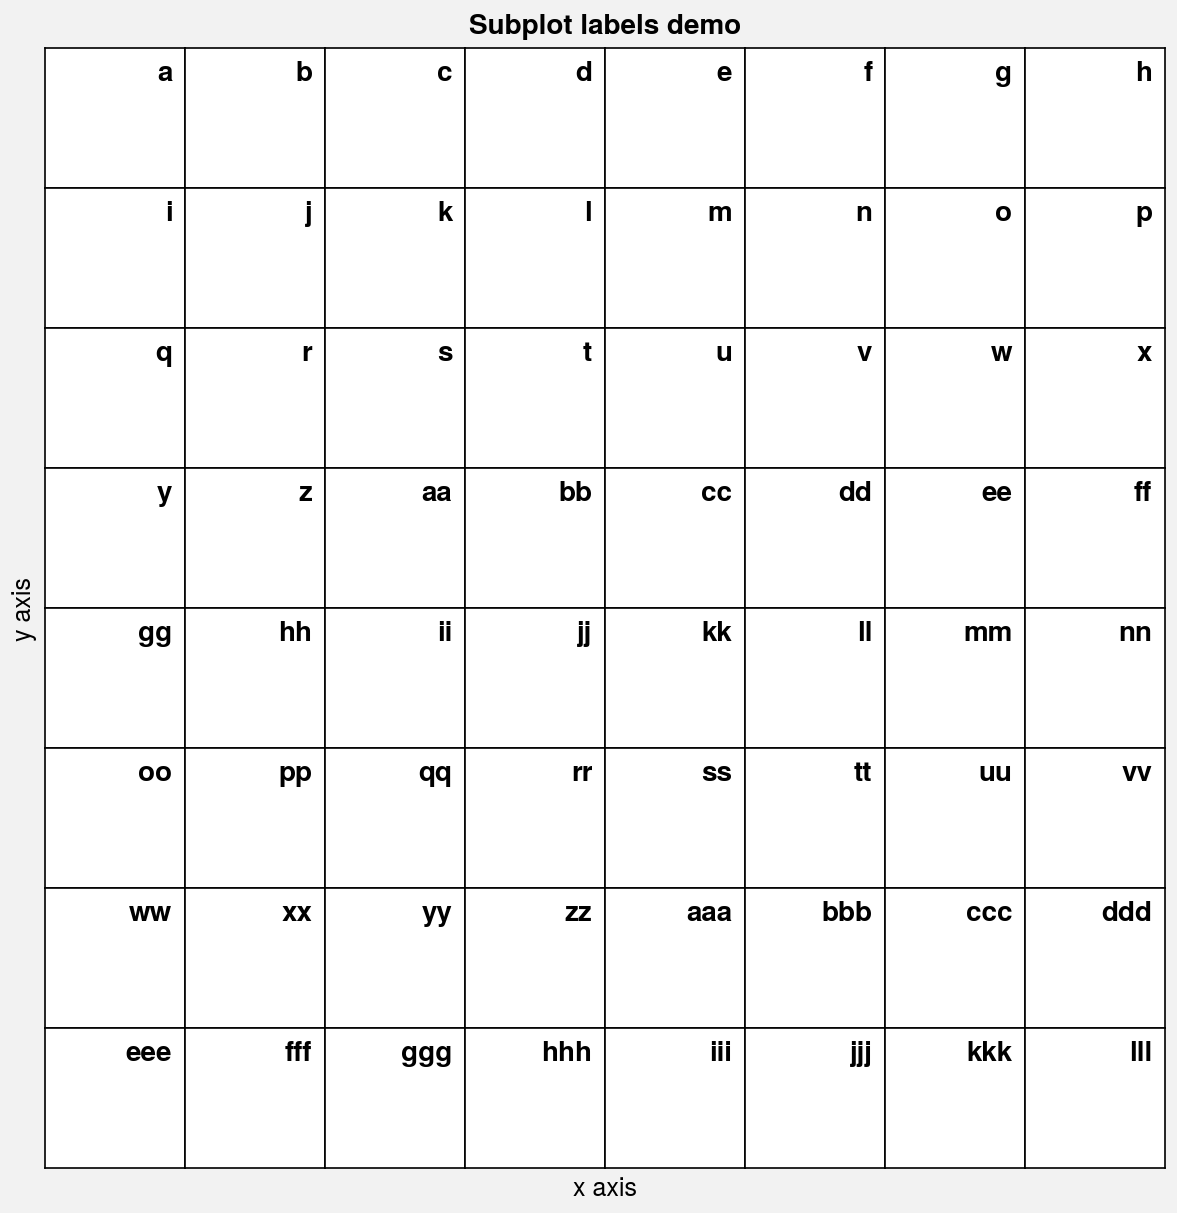

In [7]:
import proplot as plot
f, axs = plot.subplots(nrows=8, ncols=8, axwidth=0.7, space=0)
axs.format(
    abc=True, abcloc='ur', xlabel='x axis', ylabel='y axis',
    xticks=[], yticks=[], suptitle='Subplot labels demo'
)

In general sans-serif serif fonts are more appropriate for figures. That's why the show_fonts displays these. 

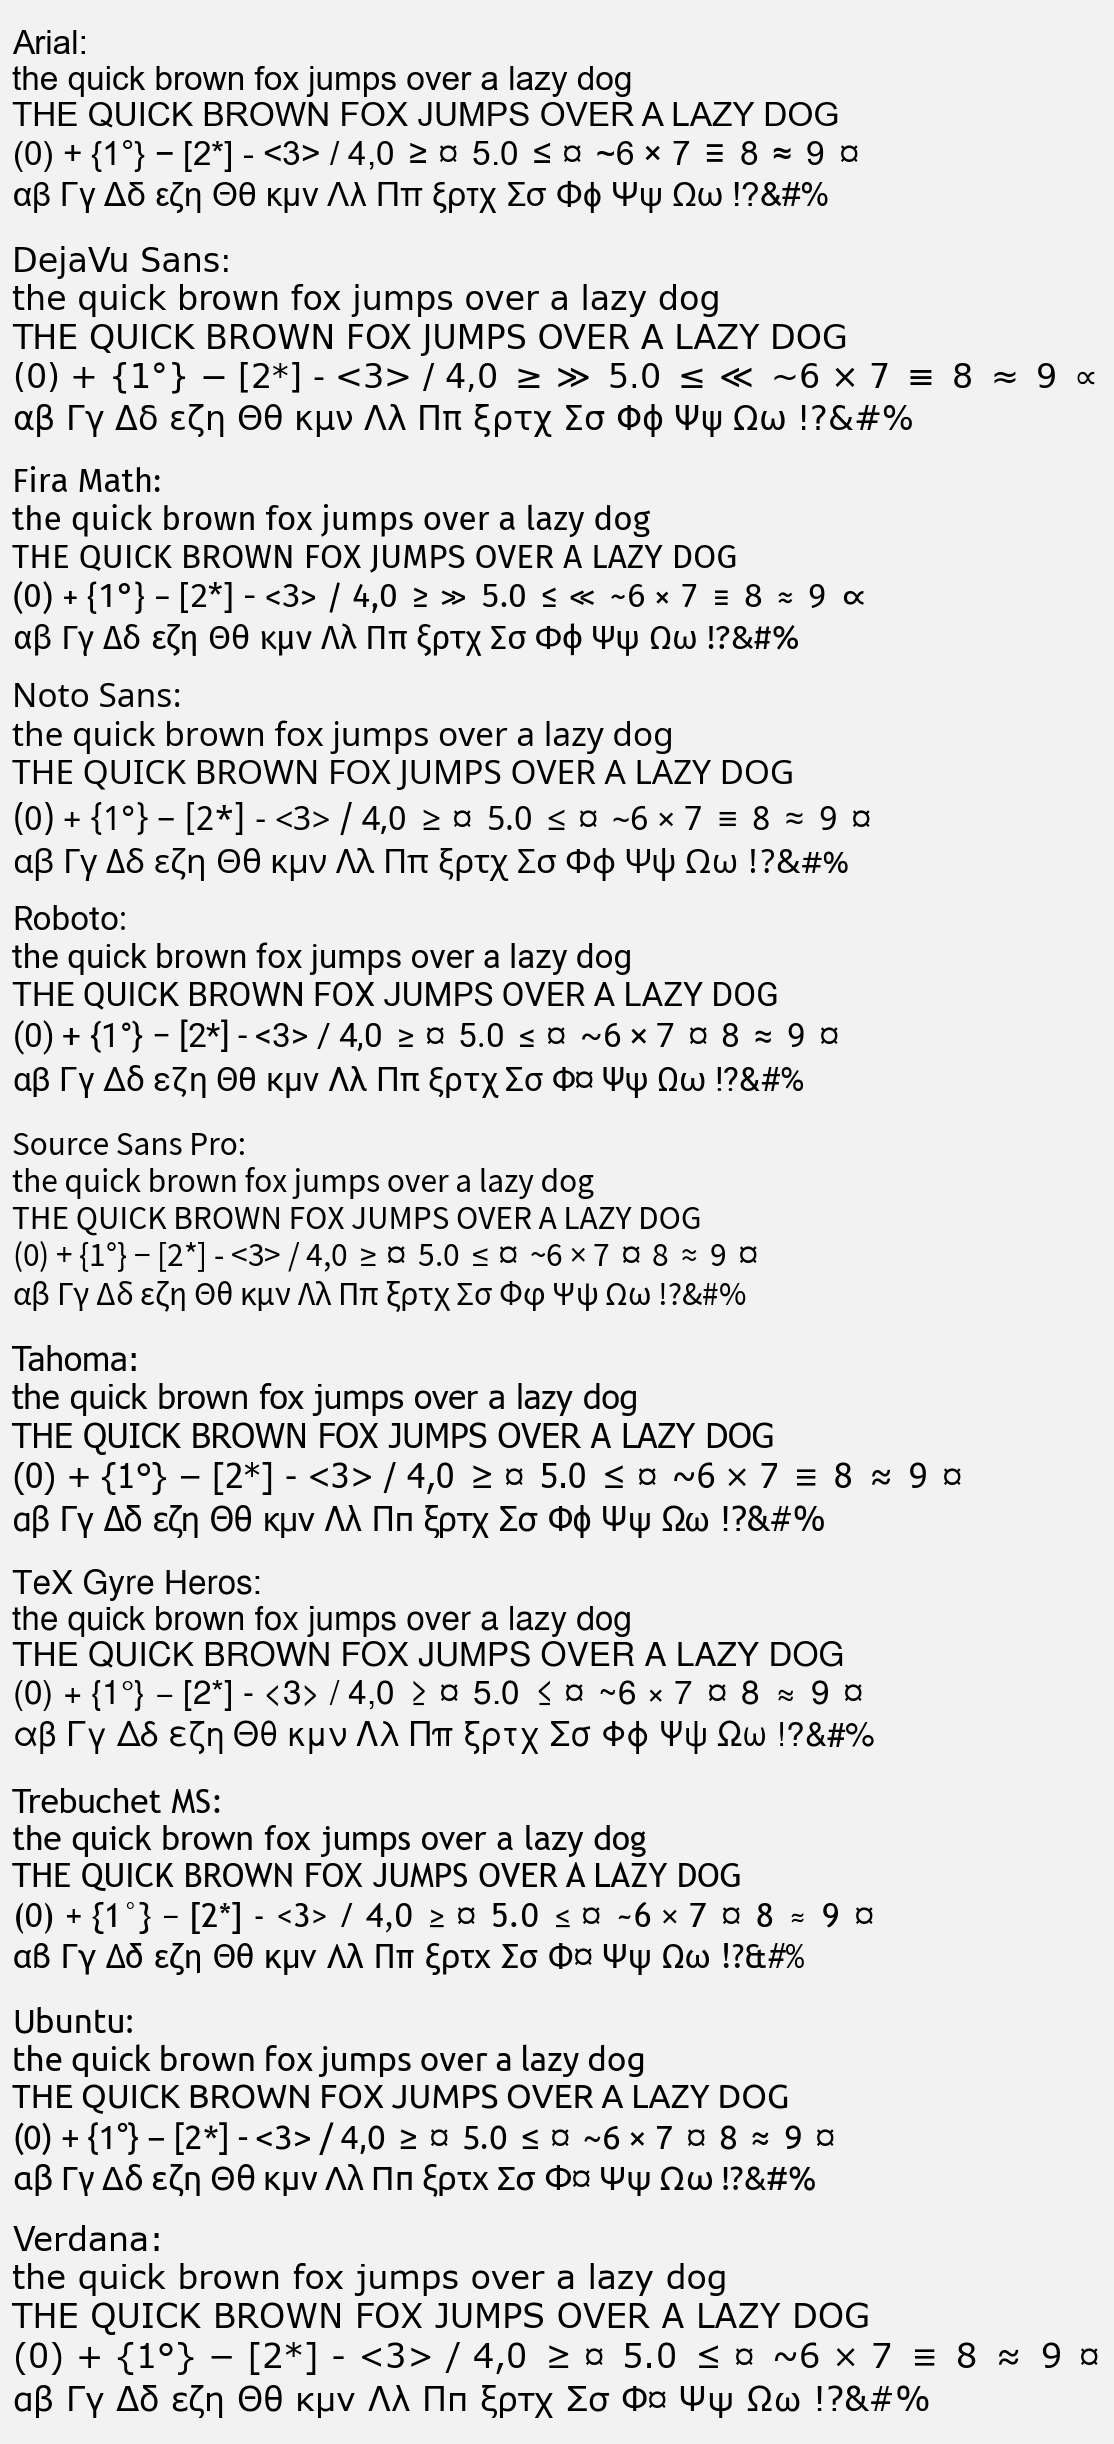

In [8]:
import proplot as plot
f = plot.show_fonts()

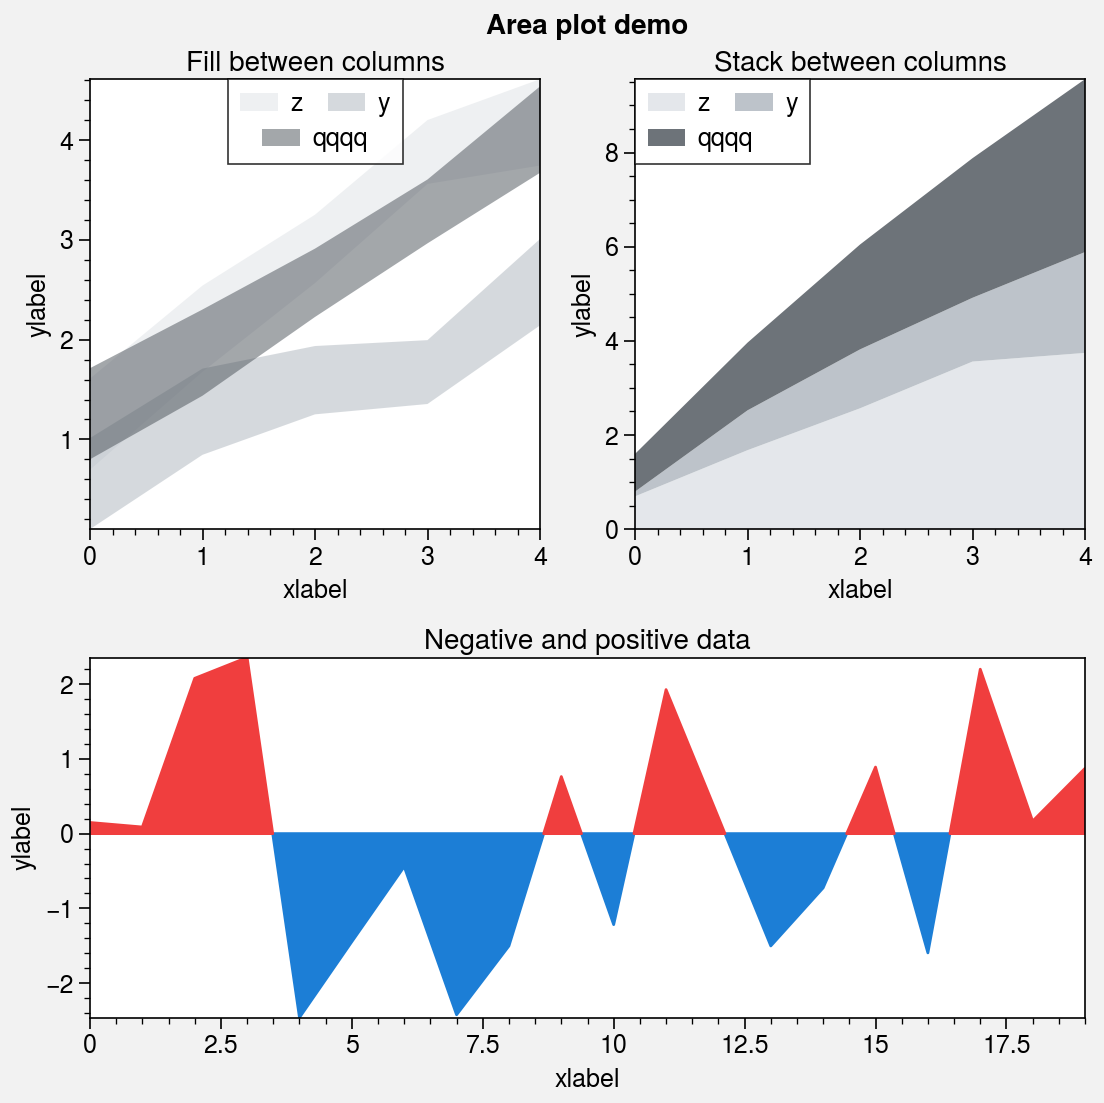

In [9]:
import numpy as np
plot.rc.margin = 0
f, axs = plot.subplots(array=[[1, 2], [3, 3]], hratios=(1, 0.8), share=0)
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Area plot demo')
state = np.random.RandomState(51423)
data = state.rand(5, 3).cumsum(axis=0)
cycle = ('gray3', 'gray5', 'gray7')

# Overlaid and stacked area patches
ax = axs[0]
ax.area(
    np.arange(5), data, data + state.rand(5)[:, None], cycle=cycle, alpha=0.5,
    legend='uc', legend_kw={'center': True, 'ncols': 2, 'labels': ['z', 'y', 'qqqq']},
)
ax.format(title='Fill between columns')
ax = axs[1]
ax.area(
    np.arange(5), data, stacked=True, cycle=cycle, alpha=0.8,
    legend='ul', legend_kw={'center': True, 'ncols': 2, 'labels': ['z', 'y', 'qqqq']},
)
ax.format(title='Stack between columns')

# Positive and negative color area patches
ax = axs[2]
data = 5*(state.rand(20)-0.5)
ax.area(data, negpos=True, negcolor='blue7', poscolor='red7')
ax.format(title='Negative and positive data', xlabel='xlabel', ylabel='ylabel')
axs.format(grid=False)
plot.rc.reset()

In [12]:
import proplot as xm



/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/proplot/utils.py:105: ProPlotWarning: You specified both figsize=(8, 12) and axwidth=1.5. Ignoring 'axwidth'.


Plotting Jan


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

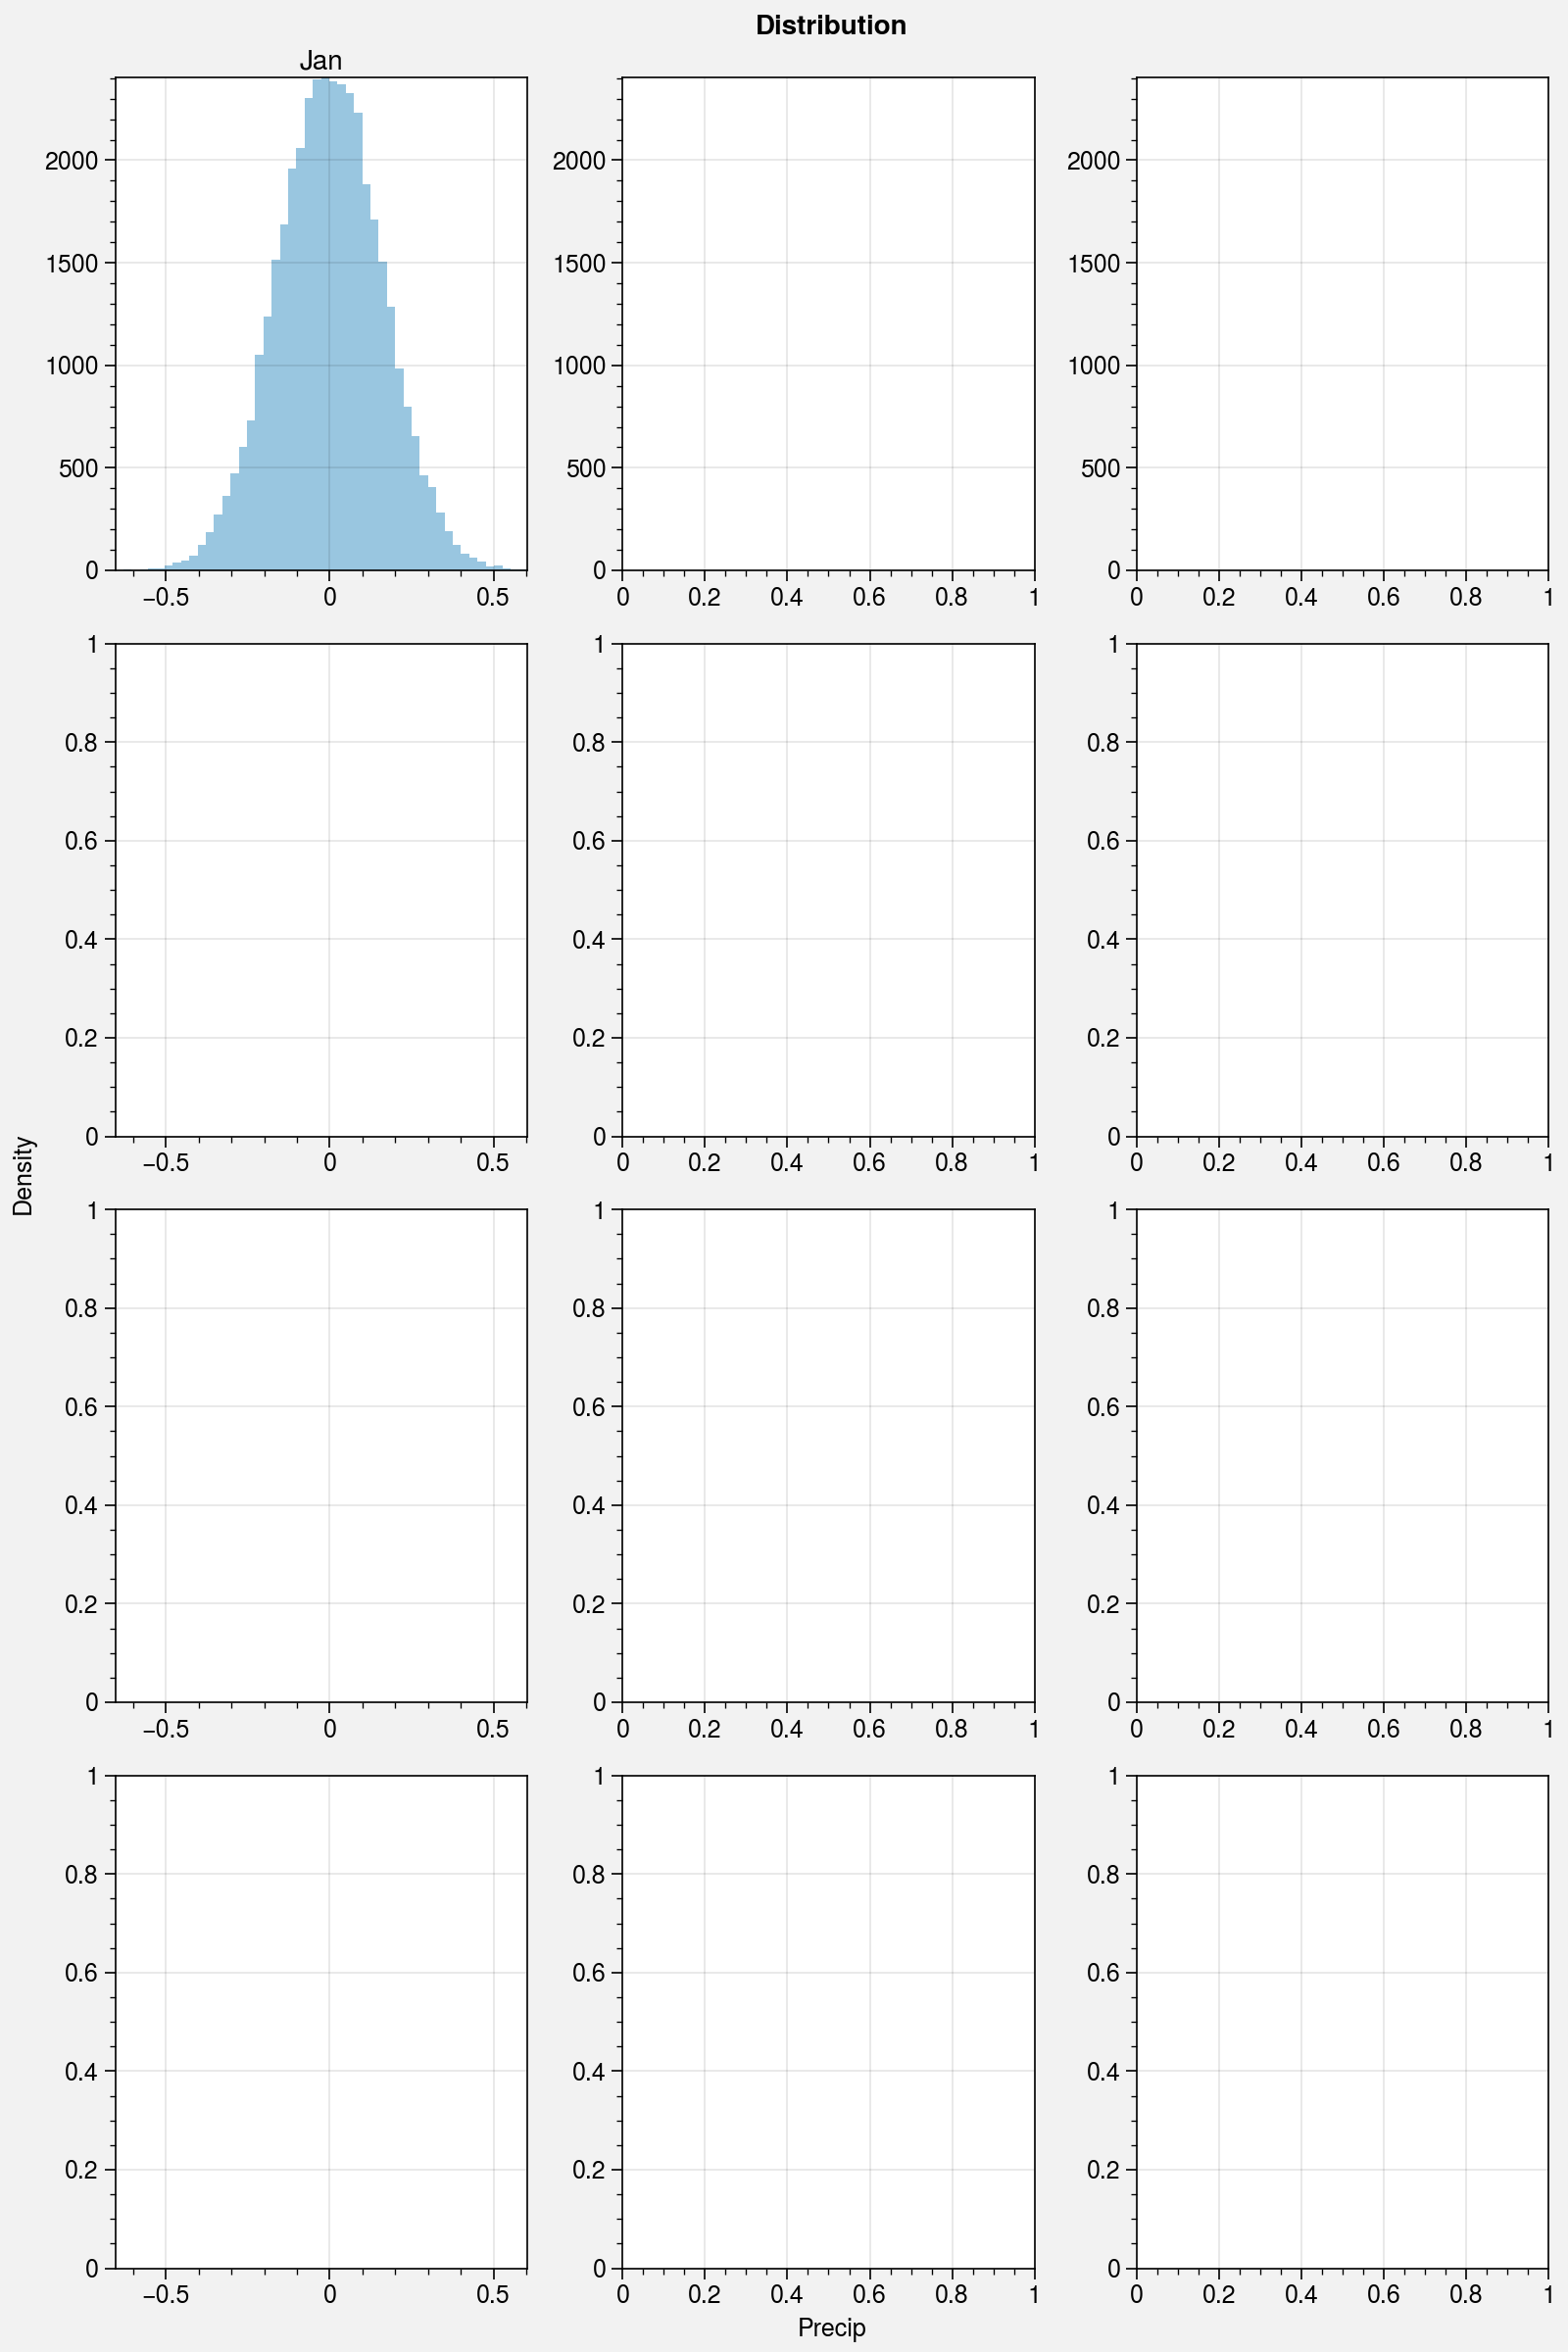

In [3]:
# minimal example

import pandas as pd
import xarray as xr
import numpy as np

import proplot as plot
import calendar



def drop_nans_and_flatten(dataArray: xr.DataArray) -> np.ndarray:
    """flatten the array and drop nans from that array. Useful for plotting histograms.

    Arguments:
    ---------
    : dataArray (xr.DataArray)
        the DataArray of your value you want to flatten
    """
    # drop NaNs and flatten
    return dataArray.values[~np.isnan(dataArray.values)]


# create dimensions of xarray object
times = pd.date_range(start='1981-01-31', end='2019-04-30', freq='M')
lat = np.linspace(0, 1, 224)
lon = np.linspace(0, 1, 176)

rand_arr = np.random.randn(len(times), len(lat), len(lon))

# create xr.Dataset
coords = {'time': times, 'lat':lat, 'lon':lon}
dims = ['time', 'lat', 'lon']
ds = xr.Dataset({'precip': (dims, rand_arr)}, coords=coords)
ds['month'], ds['year'] = ds['time.month'], ds['time.year']

# plotting actual subplots
import seaborn as sns

import proplot as plot
import calendar

f, axs = plot.subplots(nrows=4, ncols=3, axwidth=1.5, figsize=(8,12), share=2) # share=3, span=1,
axs.format(
    xlabel='Precip', ylabel='Density', suptitle='Distribution', 
)

month_abbrs = list(calendar.month_abbr)
mean_ds = ds.groupby('time.month').mean(dim='time')
flattened = []

for mth in np.arange(1, 13):
    ax = axs[mth - 1]
    ax.set_title(month_abbrs[mth])
    print(f"Plotting {month_abbrs[mth]}")
    flat = drop_nans_and_flatten(mean_ds.sel(month=mth).precip)
    flattened.append(flat)
    sns.distplot(flat, ax=ax, **{'kde': False})

/opt/anaconda3/envs/maize-Toff/lib/python3.8/site-packages/proplot/utils.py:105: ProPlotWarning: You specified both figsize=(8, 12) and axwidth=1.5. Ignoring 'axwidth'.


Plotting Jan


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

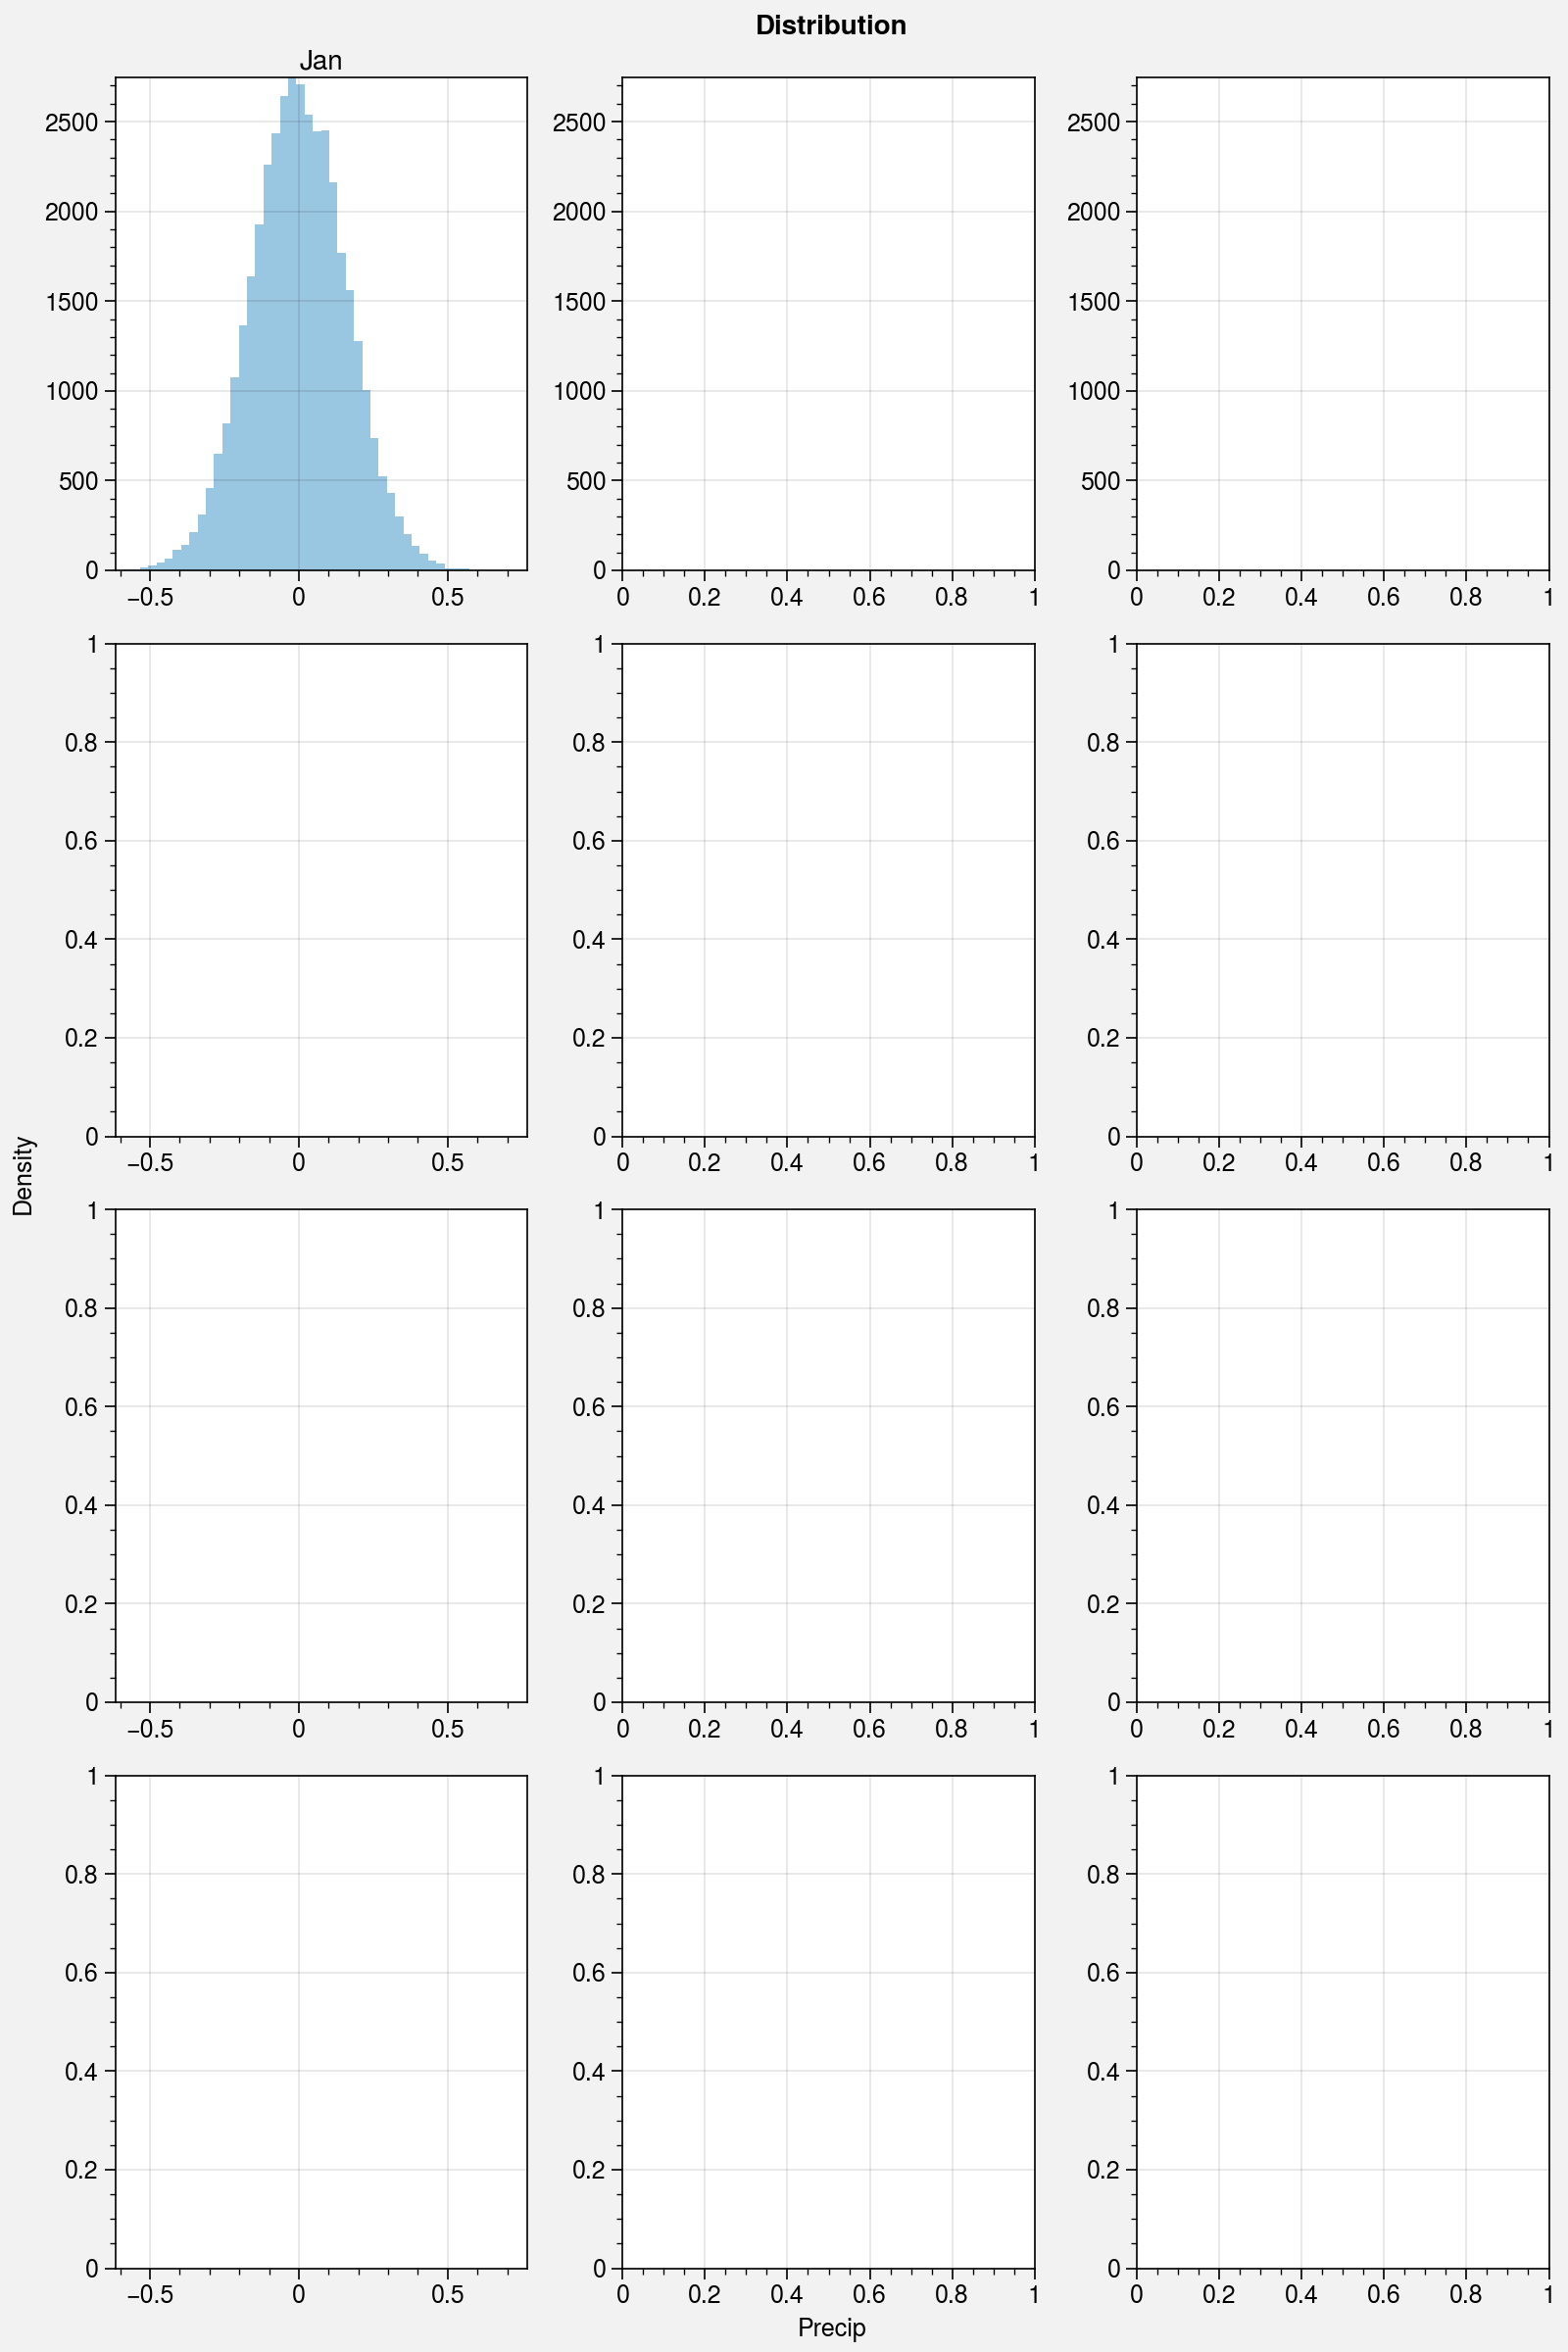

In [11]:
import pandas as pd
import xarray as xr
import numpy as np
import seaborn as sns
import proplot as plot
import calendar

def drop_nans_and_flatten(dataArray: xr.DataArray) -> np.ndarray:
    """flatten the array and drop nans from that array. Useful for plotting histograms.

    Arguments:
    ---------
    : dataArray (xr.DataArray)
        the DataArray of your value you want to flatten
    """
    # drop NaNs and flatten
    return dataArray.values[~np.isnan(dataArray.values)]


# create dimensions of xarray object
times = pd.date_range(start='1981-01-31', end='2019-04-30', freq='M')
lat = np.linspace(0, 1, 224)
lon = np.linspace(0, 1, 176)

rand_arr = np.random.randn(len(times), len(lat), len(lon))

# create xr.Dataset
coords = {'time': times, 'lat':lat, 'lon':lon}
dims = ['time', 'lat', 'lon']
ds = xr.Dataset({'precip': (dims, rand_arr)}, coords=coords)
ds['month'], ds['year'] = ds['time.month'], ds['time.year']

f, axs = plot.subplots(nrows=4, ncols=3, axwidth=1.5, figsize=(8,12), share=2) # share=3, span=1,
axs.format(
    xlabel='Precip', ylabel='Density', suptitle='Distribution', 
)

month_abbrs = list(calendar.month_abbr)
mean_ds = ds.groupby('time.month').mean(dim='time')
flattened = []
for mth in np.arange(1, 13):
    ax = axs[mth - 1]
    ax.set_title(month_abbrs[mth])
    print(f"Plotting {month_abbrs[mth]}")
    flat = drop_nans_and_flatten(mean_ds.sel(month=mth).precip)
    flattened.append(flat)
    sns.distplot(flat, ax=ax, **{'kde': False})

In [14]:
import proplot; print(proplot.version)

0.5.0
